In [1]:
import pandas as pd
from pandas import datetime
import numpy as np
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,RMSprop
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
%matplotlib inline


In [37]:
def getone(Y_pre):
    l = []
    for i in range (0,len(Y_pre)):
        b = Y_pre[i].tolist()
        l.append(b[0])
    return l

In [2]:
def get_data(code):

    data=pd.read_csv("./Desktop/text/300000/"+code+".csv") 
    data=data.drop(columns=["Unnamed: 0","ts_code","pre_close","pct_chg"])
    data['trade_date'] = data['trade_date'].map(lambda x:datetime.strptime(str(x),'%Y%m%d'))
    df = data.set_index('trade_date')
    df = df.sort_index()
    df['ma5']=df['close'].rolling(5).mean()
    df['ma10']=df['close'].rolling(10).mean()
    df = df[df.index>df.index[9]]
    
    return df

In [3]:
def plt_data(X_pre,Y_test,tittle):
    plt.plot(Y_test, color = 'black', label = 'Stock Price')
    plt.plot(X_pre, color = 'green', label = 'Predicted Stock Price')
    plt.title(tittle+'Price Prediction',font)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [4]:
def sklearn_MinMaxScaler(data):
       #数据归一处理
    sc = MinMaxScaler(feature_range = (0, 1))
    data = sc.fit_transform(data)

    return data

In [5]:
def sklearn_StandardScaler(data):
       #数据反归一处理
    sc = StandardScaler()
    data = sc.inverse_transform(data)
    return data

In [5]:
#定义 训练步长 以及测试集长度 
CONST_TRAINING_SEQUENCN_LENGTH = 20 
CONST_TRAINING_CASE = 5
CONST_TEST_CASE =200

In [6]:
def deal_data(code):
    # 1 获取数据 
    data = get_data(code)
    training_set = data[["open","high","low","close","change","vol","amount","ma5","ma10"]]
    Y_training_set = data["close"]
    
       
    #数据归一处理  
    training_set=sklearn_MinMaxScaler(training_set)
    Y_training_set = np.array(Y_training_set)
    test_set=Y_training_set.reshape(len(Y_training_set),1)
    test_set=sklearn_MinMaxScaler(test_set)
    
    # 2 构建训练数据
    X_dataTraining = []
    Y_dataTraining = []
    
    for i in range(len(training_set)-CONST_TRAINING_SEQUENCN_LENGTH-CONST_TEST_CASE):
        X_dataSegment = training_set[i:i+CONST_TRAINING_SEQUENCN_LENGTH]
        X_dataTraining.append(np.array(X_dataSegment))
    
    for i in range(len(test_set)-CONST_TRAINING_SEQUENCN_LENGTH-CONST_TEST_CASE):
        Y_dataSegment = test_set[i:i+CONST_TRAINING_CASE]
        Y_dataTraining.append(Y_dataSegment)
     
    X_dataTraining=np.array(X_dataTraining)
    Y_dataTraining=np.array(Y_dataTraining)
        
    #3.构建测试集
  
    X_Testing = []
    Y_Testing = []

    for i in range(CONST_TRAINING_SEQUENCN_LENGTH+CONST_TEST_CASE+CONST_TRAINING_CASE,CONST_TRAINING_SEQUENCN_LENGTH+CONST_TRAINING_CASE,-1):
   
         X_dataSet = training_set[-i:-(i-CONST_TRAINING_SEQUENCN_LENGTH)]
         X_Testing.append(np.array(X_dataSet))

    for i in range(CONST_TEST_CASE+CONST_TRAINING_CASE,CONST_TRAINING_CASE,-1):
        Y_dataSet = test_set[-i:-(i-CONST_TRAINING_CASE)]
        Y_Testing.append(np.array(Y_dataSet))


    X_testing=np.array(X_Testing)
    Y_testing=np.array(Y_Testing)

    return X_dataTraining,Y_dataTraining,X_testing,Y_testing

In [7]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

In [8]:
X_dataTraining.shape,Y_dataTraining.shape,X_Testing.shape,Y_test.shape

((2108, 20, 9), (2108, 5, 1), (200, 20, 9), (200, 5, 1))

In [7]:
# loss=histroy.history.get("loss")
# def draw(loss):
#     plt.plot(loss, color = 'green', label = 'loss')
#     plt.title('loss')
#     plt.xlabel('epoch')
#     plt.ylabel('loss')
#     plt.legend()
#     plt.show()

# lstm 

In [58]:
def lstm():
    model = Sequential()
    model.add(LSTM(units = 128, return_sequences = True))
    model.add(LSTM(units = 64, return_sequences = True))
    model.add(LSTM(units = 32))
    model.add(Dense(units = 5))
    model.compile(loss = "mse")
    return model


# lstm-GRU

In [59]:
def lstm_GRU():
    model = Sequential()
    model.add(LSTM(units = 128, return_sequences = True))
    #model.add(Dropout(0.2))
    model.add(GRU(units = 64, return_sequences = True))
    #model.add(Dropout(0.2))
    model.add(LSTM(units = 32))
    #model.add(Dropout(0.2))
    model.add(Dense(units = 5))
    model.compile( loss = "mse")

    return model

# GRU

In [60]:
def GRU_MODEL():
    model = Sequential()
    model.add(GRU(units = 128, return_sequences = True))
    #model.add(Dropout(0.2))
    model.add(GRU(units = 64, return_sequences = True))
    #model.add(Dropout(0.2))
    model.add(GRU(units = 32)) 
    #model.add(Dropout(0.2))
    model.add(Dense(units = 5))
    model.compile(loss = "mse")
    return model

In [16]:
model_L= lstm()
model_ALL= lstm_GRU()
model_G= GRU_MODEL()


In [66]:
model_300004_lstm= lstm()
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")
history_300004_L_200=model_300004_lstm.fit(X_dataTraining,Y_dataTraining,epochs = 200,batch_size = 64 )

Train on 2108 samples
Epoch 1/200
2108/2108 [==============================] - 13s 6ms/sample - loss: 0.00831s - loss: 0.0
Epoch 2/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0024
Epoch 3/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0024
Epoch 4/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0019
Epoch 5/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0015
Epoch 6/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0014
Epoch 7/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0014
Epoch 8/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0014
Epoch 9/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 9.4732e-04
Epoch 10/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 9.4595e-04
Epoch 11/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0010
Epoch 1

In [107]:
#model_300004_lstm.evaluate(X_Testing,Y_test)

200/200 [==============================] - 2s 11ms/sample - loss: 1.9999e-04


0.00019999005773570387

In [67]:
lstm_GRU_300004= lstm_GRU()
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")
history_300004_LG_200=lstm_GRU_300004.fit(X_dataTraining,Y_dataTraining,epochs = 200,batch_size = 64 )

Train on 2108 samples
Epoch 1/200
2108/2108 [==============================] - 14s 7ms/sample - loss: 0.0081
Epoch 2/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0029
Epoch 3/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0023
Epoch 4/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0018
Epoch 5/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0018
Epoch 6/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0013
Epoch 7/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0015 0s - loss: 0.001
Epoch 8/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0013
Epoch 9/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0011ETA: 0s - loss: 9.
Epoch 10/200
2108/2108 [==============================] - 3s 1ms/sample - loss: 9.5299e-04- loss: 0.
Epoch 11/200
2108/2108 [==============================] - 3s 1ms/sa

In [108]:
#lstm_GRU_300004.evaluate(X_Testing,Y_test)

200/200 [==============================] - 2s 11ms/sample - loss: 3.9205e-04


0.0003920537623343989

In [68]:
GRU_MODEL_300004= GGRU_MODELDEL()
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")
history_300004_G_200=GRU_MODEL_300004.fit(X_dataTraining,Y_dataTraining,epochs = 200,batch_size = 64 )

Train on 2108 samples
Epoch 1/200
2108/2108 [==============================] - 13s 6ms/sample - loss: 0.0074
Epoch 2/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0032
Epoch 3/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0026
Epoch 4/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0021
Epoch 5/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0020
Epoch 6/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0017
Epoch 7/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0014
Epoch 8/200
2108/2108 [==============================] - 4s 2ms/sample - loss: 0.0012
Epoch 9/200
2108/2108 [==============================] - 4s 2ms/sample - loss: 0.0012
Epoch 10/200
2108/2108 [==============================] - 4s 2ms/sample - loss: 0.0010
Epoch 11/200
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0012
Epoch 12/200
2108/2108 [=====

In [109]:
#GRU_MODEL_300004.evaluate(X_Testing,Y_test)

200/200 [==============================] - 2s 10ms/sample - loss: 1.1813e-04


0.00011813246179372072

In [128]:
#model_300004_lstm.evaluate(X_Testing,Y_test),lstm_GRU_300004.evaluate(X_Testing,Y_test),GRU_MODEL_300004.evaluate(X_Testing,Y_test)

200/200 [==============================] - 0s 692us/sample - loss: 1.1813e-04


(0.00019999005773570387, 0.0003920537623343989, 0.00011813246179372072)

In [123]:
Y_pre_l=model_300004_lstm.predict(X_Testing)
Y_pre_ls=lstm_GRU_300004.predict(X_Testing)
Y_pre_g=GRU_MODEL_300004.predict(X_Testing)


In [121]:

Y_pre_l=getone(Y_pre_l)
Y_pre_ls=getone(Y_pre_ls)
Y_pre_g=getone(Y_pre_g)

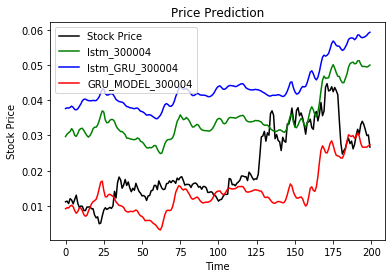

In [122]:
plt.plot(Y_test, color = 'black', label = 'Stock Price')
plt.plot(Y_pre_l, color = 'green', label = 'lstm_300004 ')
plt.plot(Y_pre_ls, color = 'blue', label = 'lstm_GRU_300004')
plt.plot(Y_pre_g, color = 'red', label = 'GRU_MODEL_300004')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

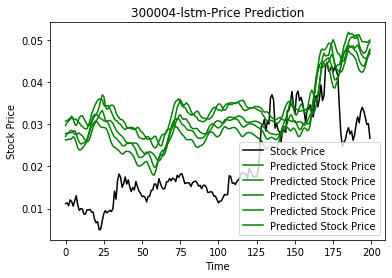

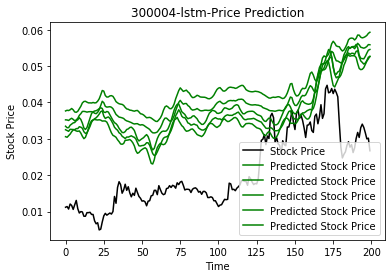

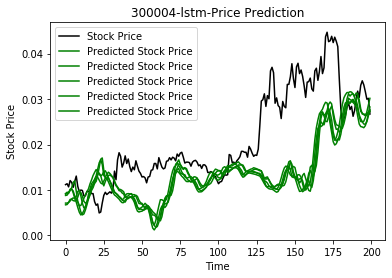

In [125]:
plt_data(Y_pre_l,Y_test,"300004-lstm-")
plt_data(Y_pre_ls,Y_test,"300004-lstm-")
plt_data(Y_pre_g,Y_test,"300004-lstm-")

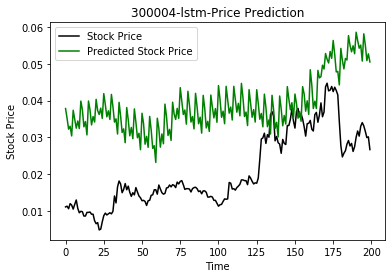

In [75]:
lg_A = []
for i in range (1,len(Y_pre_ls),5):
    b = Y_pre_ls[i].tolist()
    for j in range (0,len(b)):
        lg_A.append(b[j])
plt_data(lg_A,Y_test,"300004-lstm-")

In [ ]:
l_A = []
for i in range (1,len(Y_pre_l),5):
    b = Y_pre_l[i].tolist()
    for j in range (0,len(b)):
        l_A.append(b[j])
plt_data(l_A,Y_test,"300004-lstm-")

# Adam优化器。
参数

lr：float> = 0.学习率。
beta_1：float，0 <beta <1.通常接近于1。
beta_2：float，0 <beta <1.通常接近于1。
epsilon：浮动> = 0.模糊因子。若为None，默认为K.epsilon()。
衰减：浮点数> =0。每次参数更新后学习率衰减值。
amsgrad：布尔值。“关于亚当与超越的融合”。



# 随机梯度下降优化器。SGD


包含扩展功能的支持：-动量（动量）优化，-学习率衰减（每次参数更新后）-Nestrov动量（NAG）优化

参数

lr：float> = 0.学习率。
动量：浮动> =0。参数，用于加速SGD在相关方向上前进，并抑制震荡。
衰减：浮点数> =0。每次参数更新后学习率衰减值。
nesterov：布尔值。是否使用Nesterov动量。


# Adagrad优化器


Adagrad是一种具有特定参数学习率的优化器，它根据参数在训练期间的更新频率进行自适应调整。参数接收的更新越多，更新越小。

建议使用优化器的预设参数。

参数

lr：float> =0。学习率。
epsilon：浮点> =0。若为None，默认为K.epsilon()。
衰减：浮点数> =0。每次参数更新后学习率衰减值。

# RMSProp优化器。

建议使用优化器的预设参数（除了学习率lr，它可以被自由调节）

这个优化器通常是训练循环神经网络RNN的不错选择。

参数

lr：float> = 0.学习率。
rho：float> =0。RMSProp渐变平方的移动均值的衰减率。
epsilon：浮动> = 0.模糊因子。若为None，默认为K.epsilon()。
衰减：浮点数> =0。每次参数更新后学习率衰减值。

In [8]:
Adam_1 = Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
Adam_01 = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
Adam_001 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
Adam_1 = Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
Sgd_1 = SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
RMSprop_1=RMSprop(lr=0.1, rho=0.9, epsilon=None, decay=0.0)
Adagrad_1=Adagrad(lr=0.1, epsilon=None, decay=0.0)

model.compile(optimizer=opt,loss = "mse",metrics=["mae","acc"])

In [9]:
Sgd_1 = SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
Sgd_01 = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
Sgd_001 = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

In [10]:
RMSprop_1=RMSprop(lr=0.1, rho=0.9, epsilon=None, decay=0.0)
RMSprop_01=RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
RMSprop_001=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [11]:
Adagrad_1=Adagrad(lr=0.1, epsilon=None, decay=0.0)
Adagrad_01=Adagrad(lr=0.01, epsilon=None, decay=0.0)
Adagrad_001=Adagrad(lr=0.001, epsilon=None, decay=0.0)

# LSTM优化器的选择

In [12]:
def lstm_opt(opt):
    model = Sequential()
    model.add(LSTM(units = 128, return_sequences = True))
    model.add(LSTM(units = 64, return_sequences = True))
    model.add(LSTM(units = 32))
    model.add(Dense(units = 5))
    model.compile(optimizer=opt,loss = "mse")
    return model


In [24]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")
lstm_300004_Adam= lstm_opt(Adam_1)
lstm_300004_SGD= lstm_opt(Sgd_1)
lstm_300004_RMSprop =lstm_opt(RMSprop_1)
lstm_300004_Adagrad= lstm_opt(Adagrad_1)

lstm_300004_Adam.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )
lstm_300004_SGD.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )
lstm_300004_RMSprop.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )
lstm_300004_Adagrad.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )

Train on 2108 samples
Epoch 1/100
2108/2108 [==============================] - 9s 4ms/sample - loss: 1.6029
Epoch 2/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0297
Epoch 3/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0275
Epoch 4/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0278
Epoch 5/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0277
Epoch 6/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0274
Epoch 7/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0277
Epoch 8/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0278
Epoch 9/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0275
Epoch 10/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0279
Epoch 11/100
2108/2108 [==============================] - 3s 1ms/sample - loss: 0.0275
Epoch 12/100
2108/2108 [======

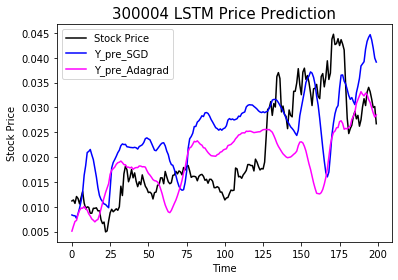

In [29]:
Y_pre_Adam=lstm_300004_Adam.predict(X_Testing)
Y_pre_SGD=lstm_300004_SGD.predict(X_Testing)
Y_pre_RMSprop=lstm_300004_RMSprop.predict(X_Testing)
Y_pre_Adagrad=lstm_300004_Adagrad.predict(X_Testing)

Y_pre_Adam = getone(Y_pre_Adam)
Y_pre_SGD =getone(Y_pre_SGD)
Y_pre_RMSprop = getone(Y_pre_RMSprop)
Y_pre_Adagrad = getone(Y_pre_Adagrad)

plt.plot(Y_test, color = 'black', label = 'Stock Price')
#plt.plot(Y_pre_Adam, color = 'green', label = 'Y_pre_Adam ')
plt.plot(Y_pre_SGD, color = 'blue', label = 'Y_pre_SGD')
#plt.plot(Y_pre_RMSprop, color = 'red', label = 'Y_pre_RMSprop')
plt.plot(Y_pre_Adagrad, color = 'fuchsia', label = 'Y_pre_Adagrad')

plt.title('300004 LSTM Price Prediction',fontdict={"fontsize":15})
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

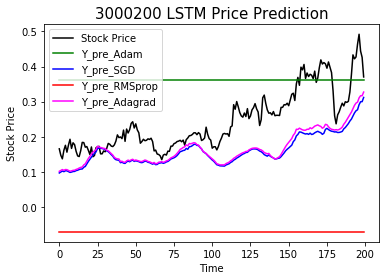

In [42]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300200")

Y_pre_Adam=lstm_300004_Adam.predict(X_Testing)
Y_pre_SGD=lstm_300004_SGD.predict(X_Testing)
Y_pre_RMSprop=lstm_300004_RMSprop.predict(X_Testing)
Y_pre_Adagrad=lstm_300004_Adagrad.predict(X_Testing)

Y_pre_Adam = getone(Y_pre_Adam)
Y_pre_SGD =getone(Y_pre_SGD)
Y_pre_RMSprop = getone(Y_pre_RMSprop)
Y_pre_Adagrad = getone(Y_pre_Adagrad)

plt.plot(Y_test, color = 'black', label = 'Stock Price')
plt.plot(Y_pre_Adam, color = 'green', label = 'Y_pre_Adam ')
plt.plot(Y_pre_SGD, color = 'blue', label = 'Y_pre_SGD')
plt.plot(Y_pre_RMSprop, color = 'red', label = 'Y_pre_RMSprop')
plt.plot(Y_pre_Adagrad, color = 'fuchsia', label = 'Y_pre_Adagrad')

plt.title('3000200 LSTM Price Prediction',fontdict={"fontsize":15})
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
Adagrad_1=Adagrad(lr=0.1, epsilon=None, decay=0.0)
Adagrad_01=Adagrad(lr=0.01, epsilon=None, decay=0.0)
Adagrad_001=Adagrad(lr=0.001, epsilon=None, decay=0.0)

# Adagrad 优化器调参 

In [43]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

lstm_300004_Adagrad_01= lstm_opt(Adagrad_01)
lstm_300004_Adagrad_001= lstm_opt(Adagrad_001)


history_lstm_300004_Adagrad_01=lstm_300004_Adagrad_01.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )
history_lstm_300004_Adagrad_001=lstm_300004_Adagrad_001.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )

Y_pre_Adagrad_1=lstm_300004_Adagrad.predict(X_Testing)
Y_pre_Adagrad_01=lstm_300004_Adagrad_01.predict(X_Testing)
Y_pre_Adagrad_001=lstm_300004_Adagrad_001.predict(X_Testing)

Y_pre_Adagrad_1=getone(Y_pre_Adagrad_1)
Y_pre_Adagrad_01=getone(Y_pre_Adagrad_01)
Y_pre_Adagrad_001=getone(Y_pre_Adagrad_001)

Train on 2108 samples
Epoch 1/100
2108/2108 [==============================] - 10s 5ms/sample - loss: 0.0233
Epoch 2/100
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0098
Epoch 3/100
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0060
Epoch 4/100
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0039
Epoch 5/100
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0029
Epoch 6/100
2108/2108 [==============================] - ETA: 0s - loss: 0.002 - 3s 2ms/sample - loss: 0.0023
Epoch 7/100
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0020
Epoch 8/100
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0018
Epoch 9/100
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0017
Epoch 10/100
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0016
Epoch 11/100
2108/2108 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch

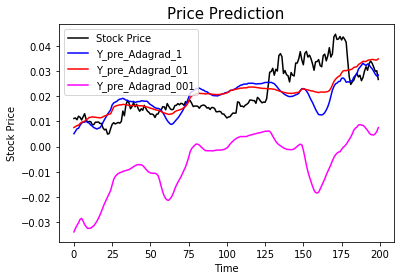

In [44]:
plt.plot(Y_test, color = 'black', label = 'Stock Price')
plt.plot(Y_pre_Adagrad_1, color = 'blue', label = 'Y_pre_Adagrad_1')
plt.plot(Y_pre_Adagrad_01, color = 'red', label = 'Y_pre_Adagrad_01')
plt.plot(Y_pre_Adagrad_001, color = 'fuchsia', label = 'Y_pre_Adagrad_001')

plt.title('Price Prediction',fontdict={"fontsize":15})
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#  神经层的调节 

In [9]:
def lstm_C3(opt):
    model = Sequential()
    model.add(LSTM(units = 512, return_sequences = True))
    model.add(LSTM(units = 256, return_sequences = True))
    model.add(LSTM(units = 128))
    model.add(Dense(units = 5))
    model.compile(optimizer=opt,loss = "mse",metrics=["mae","acc"])
    return model

In [12]:

X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

#lstm_C3_1= lstm_C3(Adagrad_1)
lstm_C3_01= lstm_C3(Adagrad_01)
#lstm_C3_001= lstm_C3(Adagrad_001)

#history_lstm_C3_1=lstm_C3_1.fit(X_dataTraining,Y_dataTraining,epochs = 60,batch_size = 40 )
history_lstm_C3_01=lstm_C3_01.fit(X_dataTraining,Y_dataTraining,epochs = 70,batch_size = 40 )
#history_lstm_C3_001=lstm_C3_001.fit(X_dataTraining,Y_dataTraining,epochs = 80,batch_size = 40 )




Train on 2108 samples
Epoch 1/70
2108/2108 [==============================] - 17s 8ms/sample - loss: 0.0257 - mae: 0.1184 - acc: 0.1765
Epoch 2/70
2108/2108 [==============================] - 11s 5ms/sample - loss: 0.0099 - mae: 0.0784 - acc: 0.1461
Epoch 3/70
2108/2108 [==============================] - 11s 5ms/sample - loss: 0.0049 - mae: 0.0526 - acc: 0.1608
Epoch 4/70
2108/2108 [==============================] - 11s 5ms/sample - loss: 0.0023 - mae: 0.0321 - acc: 0.1765
Epoch 5/70
2108/2108 [==============================] - 11s 5ms/sample - loss: 0.0013 - mae: 0.0211 - acc: 0.1883
Epoch 6/70
2108/2108 [==============================] - 12s 6ms/sample - loss: 0.0011 - mae: 0.0176 - acc: 0.1945
Epoch 7/70
2108/2108 [==============================] - 11s 5ms/sample - loss: 9.7702e-04 - mae: 0.0171 - acc: 0.1788
Epoch 8/70
2108/2108 [==============================] - 11s 5ms/sample - loss: 9.5252e-04 - mae: 0.0168 - acc: 0.1760
Epoch 9/70
2108/2108 [==============================] - 11

In [109]:
lstm_C3_1.evaluate(X_Testing,Y_test),lstm_C3_01.evaluate(X_Testing,Y_test),lstm_C3_001.evaluate(X_Testing,Y_test),

200/200 [==============================] - 0s 2ms/sample - loss: 1.4323e-04 - mae: 0.0095 - acc: 0.2450


([6.119137819041498e-05, 0.0061554206, 0.185],
 [4.7758390137460084e-05, 0.005383478, 0.18],
 [0.00014323184048407712, 0.00946779, 0.245])

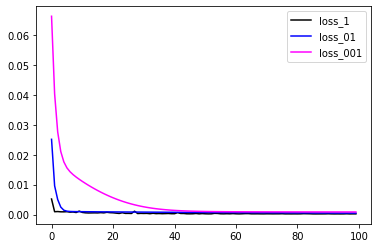

In [73]:
loss_1=history_lstm_C3_1.history.get("loss")
loss_01=history_lstm_C3_01.history.get("loss")
loss_001=history_lstm_C3_001.history.get("loss")

plt.plot(loss_1, color = 'black', label = 'loss_1')
plt.plot(loss_01, color = 'blue', label = 'loss_01')
plt.plot(loss_001, color = 'fuchsia', label = 'loss_001')
plt.legend()

In [49]:
#分别画出三个学习速度的图
def draw_pre(X_Testing,Y_test,model_1,model_01,model_001):
    Y_pre_1=model_1.predict(X_Testing)
    Y_pre_01=model_01.predict(X_Testing)
    Y_pre_001=model_001.predict(X_Testing)

    Y_pre_1=getone(Y_pre_1)
    Y_pre_01=getone(Y_pre_01)
    Y_pre_001=getone(Y_pre_001)
    plt.plot(Y_test, color = 'black', label = 'Stock Price')
    plt.plot(Y_pre_1, color = 'blue', label = 'Y_pre_1')
    plt.plot(Y_pre_01, color = 'red', label = 'Y_pre_01')
    plt.plot(Y_pre_001, color = 'fuchsia', label = 'Y_pre_001')

    plt.title('Price Prediction',fontdict={"fontsize":15})
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

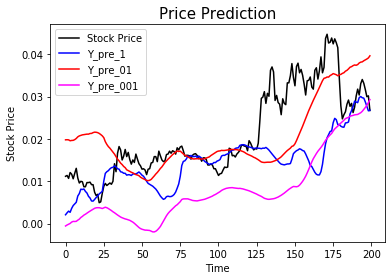

In [50]:
draw_pre(X_Testing,Y_test,lstm_C3_1,lstm_C3_01,lstm_C3_001)


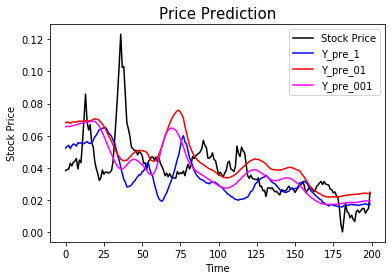

In [53]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300210")
draw_pre(X_Testing,Y_test,lstm_C3_1,lstm_C3_01,lstm_C3_001)

In [57]:
def lstm_C4(opt):
    model = Sequential()
    model.add(LSTM(units = 256, return_sequences = True))
    model.add(LSTM(units = 256, return_sequences = True))
    model.add(LSTM(units = 256, return_sequences = True))
    model.add(LSTM(units = 128))
    model.add(Dense(units = 5))
    model.compile(optimizer=opt,loss = "mse",metrics=['mae', 'acc'])

    return model

In [59]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

lstm_C4_1= lstm_C4(Adagrad_1)
lstm_C4_01= lstm_C4(Adagrad_01)
lstm_C4_001= lstm_C4(Adagrad_001)

history_lstm_C4_1=lstm_C4_1.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )
history_lstm_C4_01=lstm_C4_01.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )
history_lstm_C4_001=lstm_C4_001.fit(X_dataTraining,Y_dataTraining,epochs = 200,batch_size = 40 )


Train on 2108 samples
Epoch 1/100
2108/2108 [==============================] - 19s 9ms/sample - loss: 0.0281 - mae: 0.1271 - acc: 0.1637
Epoch 2/100
2108/2108 [==============================] - 10s 5ms/sample - loss: 0.0147 - mae: 0.0974 - acc: 0.2230
Epoch 3/100
2108/2108 [==============================] - 10s 5ms/sample - loss: 0.0091 - mae: 0.0756 - acc: 0.2453
Epoch 4/100
2108/2108 [==============================] - 10s 5ms/sample - loss: 0.0045 - mae: 0.0513 - acc: 0.2405
Epoch 5/100
2108/2108 [==============================] - 10s 5ms/sample - loss: 0.0019 - mae: 0.0304 - acc: 0.2386
Epoch 6/100
2108/2108 [==============================] - 11s 5ms/sample - loss: 0.0010 - mae: 0.0191 - acc: 0.2315
Epoch 7/100
2108/2108 [==============================] - 10s 5ms/sample - loss: 7.5357e-04 - mae: 0.0155 - acc: 0.2462
Epoch 8/100
2108/2108 [==============================] - 10s 5ms/sample - loss: 6.8204e-04 - mae: 0.0146 - acc: 0.2429
Epoch 9/100
2108/2108 [===========================

In [65]:
acc=history_lstm_C4_001.history.get("acc")

In [106]:
lstm_C4_001.evaluate(X_Testing,Y_test),lstm_C4_01.evaluate(X_Testing,Y_test),lstm_C4_1.evaluate(X_Testing,Y_test),

200/200 [==============================] - 2s 12ms/sample - loss: 6.8318e-05 - mae: 0.0071 - acc: 0.2500


([0.00022253068287682255, 0.013640225, 0.225],
 [6.417301003239117e-05, 0.006283654, 0.18],
 [6.831837788922712e-05, 0.007123341, 0.25])

In [78]:
def lstm_C4_2(opt):
    model = Sequential()
    model.add(LSTM(units = 512, return_sequences = True))
    model.add(LSTM(units = 512, return_sequences = True))
    model.add(LSTM(units = 256, return_sequences = True))
    model.add(LSTM(units = 128))
    model.add(Dense(units = 5))
    model.compile(optimizer=opt,loss = "mse",metrics=['mae', 'acc'])

    return model

In [81]:


X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

lstm_C4_2_1= lstm_C4_2(Adagrad_1)
lstm_C4_2_01= lstm_C4_2(Adagrad_01)
lstm_C4_2_001= lstm_C4_2(Adagrad_001)

history_lstm_C4_2_1=lstm_C4_2_1.fit(X_dataTraining,Y_dataTraining,epochs = 50,batch_size = 40 )
history_lstm_C4_2_01=lstm_C4_2_01.fit(X_dataTraining,Y_dataTraining,epochs = 60,batch_size = 40 )
history_lstm_C4_2_001=lstm_C4_2_001.fit(X_dataTraining,Y_dataTraining,epochs = 80,batch_size = 40 )

Train on 2108 samples
Epoch 1/50
2108/2108 [==============================] - 31s 15ms/sample - loss: 0.0089 - mae: 0.0574 - acc: 0.1817
Epoch 2/50
2108/2108 [==============================] - 22s 11ms/sample - loss: 8.3810e-04 - mae: 0.0188 - acc: 0.2011
Epoch 3/50
2108/2108 [==============================] - 23s 11ms/sample - loss: 8.2083e-04 - mae: 0.0190 - acc: 0.2045
Epoch 4/50
2108/2108 [==============================] - 22s 11ms/sample - loss: 7.2350e-04 - mae: 0.0172 - acc: 0.2073
Epoch 5/50
2108/2108 [==============================] - 21s 10ms/sample - loss: 6.2235e-04 - mae: 0.0156 - acc: 0.2154
Epoch 6/50
2108/2108 [==============================] - 21s 10ms/sample - loss: 7.7114e-04 - mae: 0.0189 - acc: 0.2092
Epoch 7/50
2108/2108 [==============================] - 21s 10ms/sample - loss: 7.9421e-04 - mae: 0.0193 - acc: 0.2158
Epoch 8/50
2108/2108 [==============================] - 21s 10ms/sample - loss: 5.7837e-04 - mae: 0.0149 - acc: 0.2059
Epoch 9/50
2108/2108 [========

In [107]:
lstm_C4_2_001.evaluate(X_Testing,Y_test),lstm_C4_2_01.evaluate(X_Testing,Y_test),lstm_C4_2_1.evaluate(X_Testing,Y_test)

200/200 [==============================] - 3s 14ms/sample - loss: 6.5601e-05 - mae: 0.0072 - acc: 0.2750


([0.0001378732029115781, 0.009974208, 0.27],
 [7.771852455334738e-05, 0.007374071, 0.245],
 [6.560075882589445e-05, 0.007164333, 0.275])

In [13]:
def lstm_C6(opt):
    model = Sequential()
    model.add(LSTM(units = 512, return_sequences = True))
    model.add(LSTM(units = 512, return_sequences = True))
    model.add(LSTM(units = 256, return_sequences = True))
    model.add(LSTM(units = 256, return_sequences = True))
    model.add(LSTM(units = 128, return_sequences = True))
    model.add(LSTM(units = 128))
    model.add(Dense(units = 5))
    model.compile(optimizer=opt,loss = "mse",metrics=['mae', 'acc'])

    return model

In [14]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

#lstm_C6_1= lstm_C6(Adagrad_1)
lstm_C6_01= lstm_C6(Adagrad_01)
#lstm_C6_001= lstm_C6(Adagrad_001)

#history_lstm_C6_1=lstm_C6_1.fit(X_dataTraining,Y_dataTraining,epochs = 150,batch_size = 40 )
history_lstm_C6_01=lstm_C6_01.fit(X_dataTraining,Y_dataTraining,epochs = 150,batch_size = 40 )
#history_lstm_C6_001=lstm_C6_001.fit(X_dataTraining,Y_dataTraining,epochs = 150,batch_size = 40 )

Train on 2108 samples
Epoch 1/150
2108/2108 [==============================] - 36s 17ms/sample - loss: 0.0381 - mae: 0.1456 - acc: 0.1428
Epoch 2/150
2108/2108 [==============================] - 25s 12ms/sample - loss: 0.0257 - mae: 0.1275 - acc: 0.1433
Epoch 3/150
2108/2108 [==============================] - 24s 12ms/sample - loss: 0.0249 - mae: 0.1264 - acc: 0.1760
Epoch 4/150
2108/2108 [==============================] - 25s 12ms/sample - loss: 0.0239 - mae: 0.1240 - acc: 0.1717
Epoch 5/150
2108/2108 [==============================] - 25s 12ms/sample - loss: 0.0227 - mae: 0.1208 - acc: 0.1594
Epoch 6/150
2108/2108 [==============================] - 25s 12ms/sample - loss: 0.0211 - mae: 0.1164 - acc: 0.1594
Epoch 7/150
2108/2108 [==============================] - 25s 12ms/sample - loss: 0.0188 - mae: 0.1098 - acc: 0.1618
Epoch 8/150
2108/2108 [==============================] - 25s 12ms/sample - loss: 0.0157 - mae: 0.1002 - acc: 0.1551
Epoch 9/150
2108/2108 [===========================

In [108]:
lstm_C6_1.evaluate(X_Testing,Y_test),lstm_C6_01.evaluate(X_Testing,Y_test),lstm_C6_001.evaluate(X_Testing,Y_test)

200/200 [==============================] - 4s 19ms/sample - loss: 2.9212e-04 - mae: 0.0145 - acc: 0.1500


([0.0001294753549154848, 0.009935569, 0.18],
 [5.345121535356156e-05, 0.005731107, 0.15],
 [0.0002921152045018971, 0.014525068, 0.15])

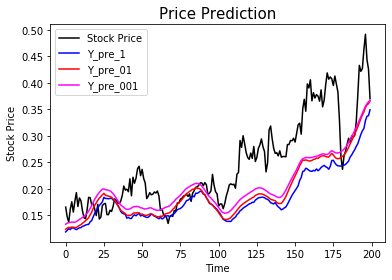

In [96]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300200")
draw_pre(X_Testing,Y_test,lstm_C6_1,lstm_C6_01,lstm_C6_001)

# C3 C6模型 预测

In [60]:
def check_model(code):
    X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data(code)
    Y_pre_C3=lstm_C3_01.predict(X_Testing)
    Y_pre_C6=lstm_C6_01.predict(X_Testing)

    Y_pre_C3 = getone(Y_pre_C3)
    Y_test = getone(Y_test)
    Y_pre_C6 = getone(Y_pre_C6)

    plt.plot(Y_test, color = 'black', label = 'Stock Price')
    plt.plot(Y_pre_C3, color = 'green', label = 'Y_pre_C3')
    plt.plot(Y_pre_C6, color = 'red', label = 'Y_pre_C6')
    plt.title(code+' - LSTM - Prediction',fontdict={"fontsize":15})
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

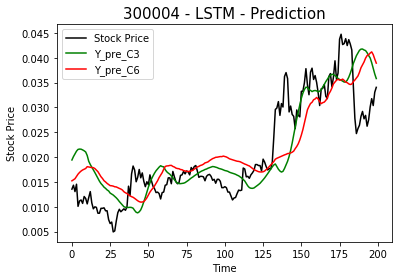

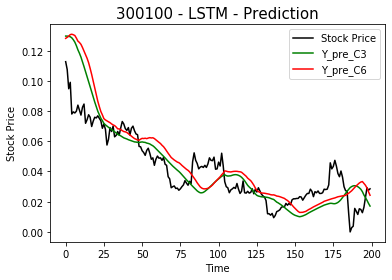

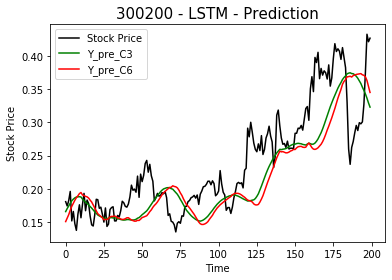

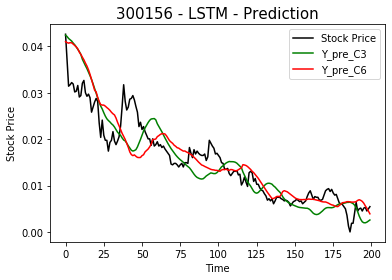

(None, None, None, None)

In [61]:
check_model("300004"),check_model("300100"),check_model("300200"),check_model("300156"),

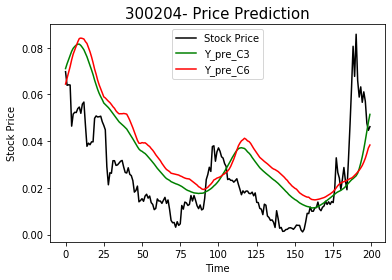

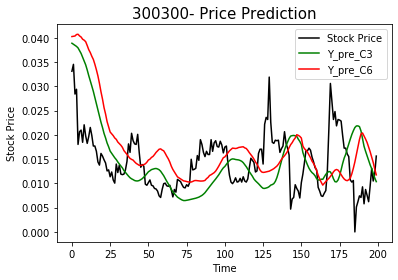

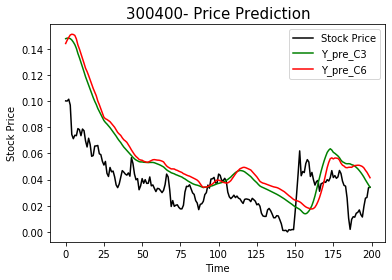

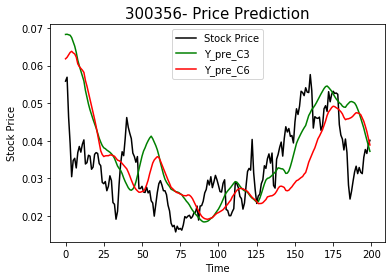

(None, None, None, None)

In [54]:
check_model("300204"),check_model("300300"),check_model("300400"),check_model("300356"),

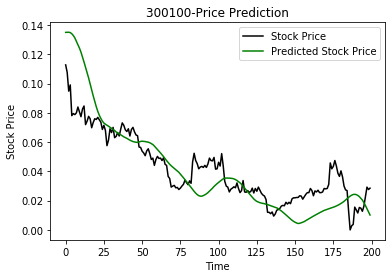

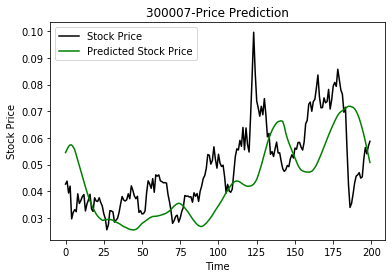

In [112]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300100")
Y_pre_C4=lstm_C4_2_001.predict(X_Testing)

Y_pre_C4 = getone(Y_pre_C4)
Y_test = getone(Y_test)
plt_data(Y_pre_C4,Y_test,"300100-")

X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300007")
Y_pre_C4=lstm_C4_2_001.predict(X_Testing)

Y_pre_C4 = getone(Y_pre_C4)
Y_test = getone(Y_test)
plt_data(Y_pre_C4,Y_test,"300007-")

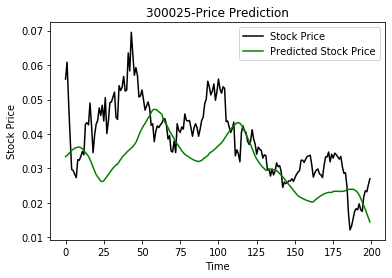

In [113]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300025")
Y_pre_C4=lstm_C4_2_001.predict(X_Testing)

Y_pre_C4 = getone(Y_pre_C4)
Y_test = getone(Y_test)
plt_data(Y_pre_C4,Y_test,"300025-")

# GRU_C6

In [15]:
def GRU_C6(opt):
    model = Sequential()
    model.add(GRU(units = 512, return_sequences = True))
    model.add(GRU(units = 512, return_sequences = True))
    model.add(GRU(units = 256, return_sequences = True))
    model.add(GRU(units = 256, return_sequences = True))
    model.add(GRU(units = 128, return_sequences = True))
    model.add(GRU(units = 128))
    model.add(Dense(units = 5))
    model.compile(optimizer=opt,loss = "mse",metrics=['mae', 'acc'])

    return model

In [16]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

GRU_C6_1= GRU_C6(Sgd_1)
GRU_C6_01= GRU_C6(Sgd_01)
GRU_C6_001= GRU_C6(Sgd_001)

history_GRU_C6_1=GRU_C6_1.fit(X_dataTraining,Y_dataTraining,epochs = 60,batch_size = 40 )
history_GRU_C6_01=GRU_C6_01.fit(X_dataTraining,Y_dataTraining,epochs = 70,batch_size = 40 )
history_GRU_C6_001=GRU_C6_001.fit(X_dataTraining,Y_dataTraining,epochs = 80,batch_size = 40 )


Train on 2108 samples
Epoch 1/70
2108/2108 [==============================] - 35s 17ms/sample - loss: 0.0291 - mae: 0.1291 - acc: 0.2026
Epoch 2/70
2108/2108 [==============================] - 21s 10ms/sample - loss: 0.0144 - mae: 0.0957 - acc: 0.1940
Epoch 3/70
2108/2108 [==============================] - 21s 10ms/sample - loss: 0.0073 - mae: 0.0659 - acc: 0.2111
Epoch 4/70
2108/2108 [==============================] - 22s 10ms/sample - loss: 0.0031 - mae: 0.0384 - acc: 0.2120
Epoch 5/70
2108/2108 [==============================] - 22s 10ms/sample - loss: 0.0018 - mae: 0.0253 - acc: 0.2177
Epoch 6/70
2108/2108 [==============================] - 22s 10ms/sample - loss: 0.0016 - mae: 0.0218 - acc: 0.2154
Epoch 7/70
2108/2108 [==============================] - 22s 10ms/sample - loss: 0.0015 - mae: 0.0209 - acc: 0.2149
Epoch 8/70
2108/2108 [==============================] - 21s 10ms/sample - loss: 0.0015 - mae: 0.0207 - acc: 0.2215
Epoch 9/70
2108/2108 [==============================] - 22

In [19]:
GRU_C6_1.evaluate(X_Testing,Y_test),GRU_C6_01.evaluate(X_Testing,Y_test),GRU_C6_001.evaluate(X_Testing,Y_test)

NameError: name 'GRU_C6_1' is not defined

In [31]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")
#draw_pre(X_Testing,Y_test,GRU_C6_1,GRU_C6_01,GRU_C6_001)

In [32]:
GRU_C6_01.evaluate(X_Testing,Y_test)

200/200 [==============================] - 1s 3ms/sample - loss: 6.9513e-05 - mae: 0.0069 - acc: 0.2500


[6.951296134502627e-05, 0.00688237, 0.25]

In [25]:
X_Testing.shape,Y_test.shape

((200, 20, 9), (200, 5, 1))

# GRU_C4_2

In [33]:
def GRU_C4_2(opt):
    model = Sequential()
    model.add(GRU(units = 512, return_sequences = True))
    model.add(GRU(units = 512, return_sequences = True))
    model.add(GRU(units = 256, return_sequences = True))
    model.add(GRU(units = 128))
    model.add(Dense(units = 5))
    model.compile(optimizer=opt,loss = "mse",metrics=['mae', 'acc'])

    return model



In [18]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

GRU_C4_2_1= GRU_C4_2(Sgd_1)
GRU_C4_2_01= GRU_C4_2(Sgd_01)
GRU_C4_2_001= GRU_C4_2(Sgd_001)

history_GRU_C4_2_1=GRU_C4_2_1.fit(X_dataTraining,Y_dataTraining,epochs = 70,batch_size = 40 )
history_GRU_C4_2_01=GRU_C4_2_01.fit(X_dataTraining,Y_dataTraining,epochs = 80,batch_size = 40 )
history_GRU_C4_2_001=GRU_C4_2_001.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )

Train on 2108 samples
Epoch 1/80
2108/2108 [==============================] - 26s 12ms/sample - loss: 0.0202 - mae: 0.1061 - acc: 0.1888
Epoch 2/80
2108/2108 [==============================] - 18s 8ms/sample - loss: 0.0072 - mae: 0.0641 - acc: 0.2514
Epoch 3/80
2108/2108 [==============================] - 18s 9ms/sample - loss: 0.0037 - mae: 0.0419 - acc: 0.2557
Epoch 4/80
2108/2108 [==============================] - 18s 9ms/sample - loss: 0.0026 - mae: 0.0310 - acc: 0.2519
Epoch 5/80
2108/2108 [==============================] - 18s 8ms/sample - loss: 0.0022 - mae: 0.0264 - acc: 0.2524
Epoch 6/80
2108/2108 [==============================] - 18s 9ms/sample - loss: 0.0022 - mae: 0.0248 - acc: 0.2538
Epoch 7/80
2108/2108 [==============================] - 18s 9ms/sample - loss: 0.0021 - mae: 0.0245 - acc: 0.2628
Epoch 8/80
2108/2108 [==============================] - 18s 9ms/sample - loss: 0.0021 - mae: 0.0241 - acc: 0.2557
Epoch 9/80
2108/2108 [==============================] - 18s 9ms/s

In [116]:
GRU_C4_2_1.evaluate(X_Testing,Y_test),GRU_C4_2_01.evaluate(X_Testing,Y_test),GRU_C4_2_01.evaluate(X_Testing,Y_test)

200/200 [==============================] - 1s 3ms/sample - loss: 3.4289e-05 - mae: 0.0044 - acc: 0.2200


([0.0001417355735611636, 0.009646253, 0.175],
 [3.4288698880118315e-05, 0.0043736766, 0.22],
 [3.4288698880118315e-05, 0.0043736766, 0.22])

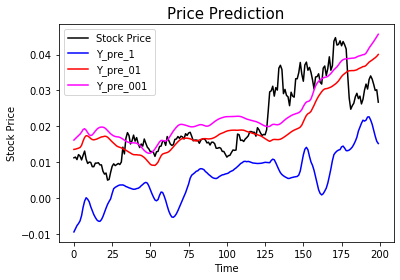

In [100]:
#X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300210")
draw_pre(X_Testing,Y_test,GRU_C4_2_1,GRU_C4_2_01,GRU_C4_2_001)

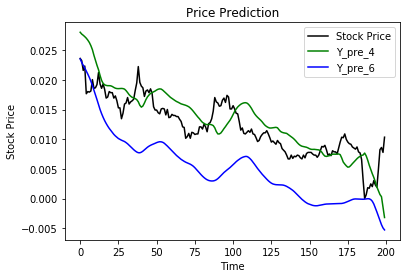

In [43]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300159")
Y_pre_4 =GRU_C4_2_01.predict(X_Testing)
Y_pre_6 =GRU_C6_01.predict(X_Testing)
plt.plot(getone(Y_test), color = 'black', label = 'Stock Price')
plt.plot(getone(Y_pre_4), color = 'green', label = 'Y_pre_4 ')
plt.plot(getone(Y_pre_6), color = 'blue', label = 'Y_pre_6')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# GRU_C4_1

In [ ]:
def GRU_C4(opt):
    model = Sequential()
    model.add(GRU(units = 256, return_sequences = True))
    model.add(GRU(units = 256, return_sequences = True))
    model.add(GRU(units = 256, return_sequences = True))
    model.add(GRU(units = 128))
    model.add(Dense(units = 5))
    model.compile(optimizer=opt,loss = "mse",metrics=['mae', 'acc'])

    return model

X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

GRU_C4_1= GRU_C4(Sgd_1)
GRU_C4_01= GRU_C4(Sgd_01)
GRU_C4_001= GRU_C4(Sgd_001)

history_GRU_C4_1=GRU_C4_1.fit(X_dataTraining,Y_dataTraining,epochs = 70,batch_size = 40 )
history_GRU_C4_01=GRU_C4_01.fit(X_dataTraining,Y_dataTraining,epochs = 80,batch_size = 40 )
history_GRU_C4_001=GRU_C4_001.fit(X_dataTraining,Y_dataTraining,epochs = 100,batch_size = 40 )

In [ ]:
GRU_C4_1.evaluate(X_Testing,Y_test),GRU_C4_01.evaluate(X_Testing,Y_test),GRU_C4_001.evaluate(X_Testing,Y_test)

# GRU_C3

In [ ]:
def GRU_C3(opt):
    model = Sequential()
    model.add(GRU(units = 512, return_sequences = True))
    model.add(GRU(units = 256, return_sequences = True))
    model.add(GRU(units = 128))
    model.add(Dense(units = 5))
    model.compile(optimizer=opt,loss = "mse",metrics=["mae","acc"])
    return model
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300004")

GRU_C3_1= GRU_C3(Sgd_1)
GRU_C3_01= GRU_C3(Sgd_01)
GRU_C3_001= GRU_C3(Sgd_001)

history_GRU_C3_1=GRU_C3_1.fit(X_dataTraining,Y_dataTraining,epochs = 80,batch_size = 40 )
history_GRU_C3_01=GRU_C3_01.fit(X_dataTraining,Y_dataTraining,epochs = 90,batch_size = 40 )
history_GRU_C3_001=GRU_C3_001.fit(X_dataTraining,Y_dataTraining,epochs =100,batch_size = 40 )

GRU_C3_1.evaluate(X_Testing,Y_test),GRU_C3_01.evaluate(X_Testing,Y_test),GRU_C3_001.evaluate(X_Testing,Y_test)

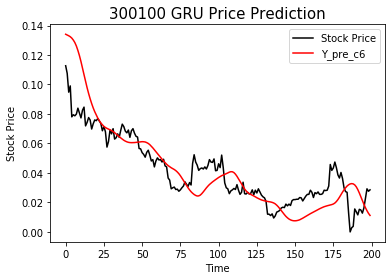

In [123]:
X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data("300100")

Y_pre_c6=GRU_C6_01.predict(X_Testing)


Y_pre_c6=getone(Y_pre_c6)
Y_test_1=getone(Y_test)
plt.plot(Y_test_1, color = 'black', label = 'Stock Price')
plt.plot(Y_pre_c6, color = 'red', label = 'Y_pre_c6')

plt.title('300100 GRU Price Prediction',fontdict={"fontsize":15})
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 测试 GRU   C6 和 C4_2

In [58]:
def check_model_gru(code):
    X_dataTraining,Y_dataTraining,X_Testing,Y_test=deal_data(code)
    Y_pre_C4=GRU_C4_2_01.predict(X_Testing)
    Y_pre_C6=GRU_C6_01.predict(X_Testing)

    Y_pre_C4 = getone(Y_pre_C4)
    Y_test = getone(Y_test)
    Y_pre_C6 = getone(Y_pre_C6)

    plt.plot(Y_test, color = 'black', label = 'Stock Price')
    plt.plot(Y_pre_C4, color = 'green', label = 'Y_pre_C4')
    plt.plot(Y_pre_C6, color = 'red', label = 'Y_pre_C6')
    plt.title(code+' - GRU - Prediction',fontdict={"fontsize":15})
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

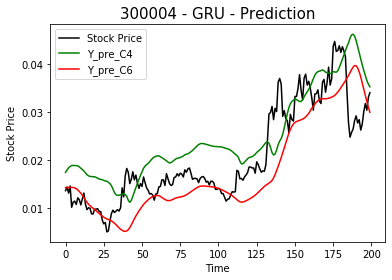

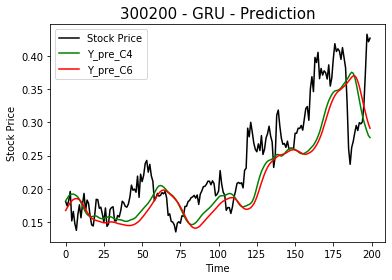

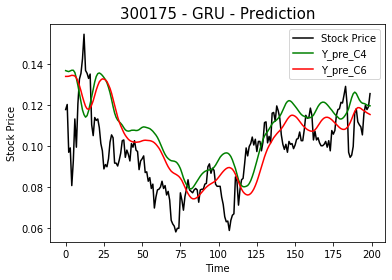

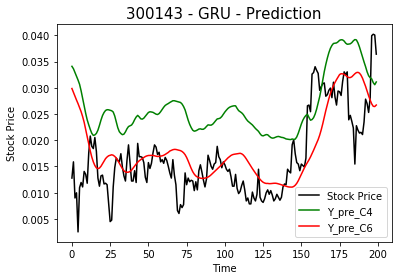

(None, None, None, None)

In [59]:
check_model_gru("300004"),check_model_gru("300200"),check_model_gru("300175"),check_model_gru("300143")

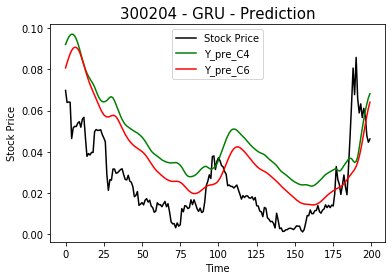

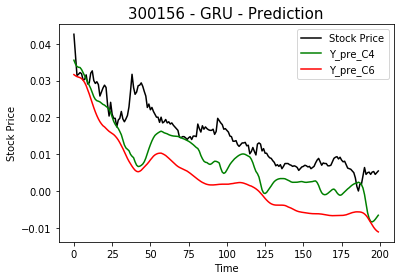

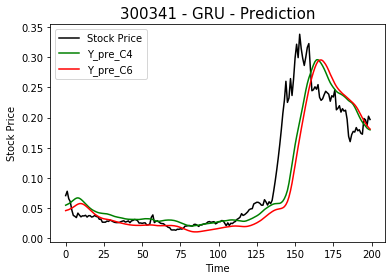

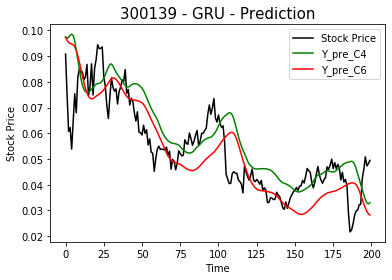

(None, None, None, None)

In [62]:
check_model_gru("300204"),check_model_gru("300156"),check_model_gru("300341"),check_model_gru("300139")